# Project Title: Predicting User Spending Segments in Mobile Game Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset
df = pd.read_csv("mobile_game_inapp_purchases.csv")
print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
                                 UserID   Age  Gender      Country   Device  \
0  c9889ab0-9cfc-4a75-acd9-5eab1df0015c  49.0    Male       Norway  Android   
1  7c9e413c-ecca-45f2-a780-2826a07952a2  15.0    Male  Switzerland      iOS   
2  fd61e419-1a92-4f43-a8c7-135842ad328a  23.0    Male        China  Android   
3  bdb7f6d1-ff9a-468c-afe7-43f32a94293e  31.0    Male       Mexico  Android   
4  aa7eec14-4846-47b9-b879-9c98038cda04  37.0  Female        India  Android   

       GameGenre  SessionCount  AverageSessionLength SpendingSegment  \
0  Battle Royale             9                 12.83          Minnow   
1     Action RPG            11                 19.39          Minnow   
2       Fighting             9                  8.87          Minnow   
3         Racing            12                 19.56          Minnow   
4  Battle Royale            10                 15.23          Minnow   

   InAppPurchaseAmount  FirstPurchaseDaysAfterInstall PaymentMet

In [3]:
#  Basic Information
df.tail()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
3019,29f9fea9-591d-4e9f-a662-958655d3eb4a,19.0,Female,Iran,Android,Fighting,7,34.81,Minnow,12.48,16.0,Google Pay,2025-05-28
3020,c906eb00-fb33-4bf2-97a4-311634cd0d7a,48.0,Male,Switzerland,iOS,Adventure,9,19.45,Minnow,14.77,14.0,Carrier Billing,2025-07-25
3021,26e17717-ebec-42a9-aae2-2eff66888119,44.0,Male,France,Android,Card,15,20.54,Minnow,16.69,24.0,Gift Card,2025-01-25
3022,4d6e2bfb-cb11-411a-942c-4fb7a4832088,45.0,Male,Sweden,iOS,Fighting,8,14.48,Minnow,17.29,15.0,Paypal,2025-05-07
3023,37935b2e-9b5d-4a30-bf0f-751d105e31e3,22.0,Male,Egypt,Android,Adventure,10,28.54,Minnow,4.11,30.0,Carrier Billing,2025-07-06


In [4]:
df.columns

Index(['UserID', 'Age', 'Gender', 'Country', 'Device', 'GameGenre',
       'SessionCount', 'AverageSessionLength', 'SpendingSegment',
       'InAppPurchaseAmount', 'FirstPurchaseDaysAfterInstall', 'PaymentMethod',
       'LastPurchaseDate'],
      dtype='object')

In [5]:
df.shape

(3024, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            2964 non-null   float64
 2   Gender                         2964 non-null   object 
 3   Country                        2964 non-null   object 
 4   Device                         2964 non-null   object 
 5   GameGenre                      2964 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            2888 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2888 non-null   float64
 11  PaymentMethod                  2888 non-null   object 
 12  LastPurchaseDate               2888 non-null   o

In [7]:
df.describe()

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall
count,2964.000000,3024.000000,3024.000000,2888.000000,2888.000000
mean,33.533738,10.074735,20.073978,102.582864,15.384003
std,11.992258,3.115863,8.585208,454.339708,8.946191
min,13.000000,1.000000,5.010000,0.000000,0.000000
25%,23.000000,8.000000,12.680000,5.987500,8.000000
50%,33.000000,10.000000,20.315000,11.975000,16.000000
75%,44.000000,12.000000,27.420000,17.762500,23.000000
max,54.000000,22.000000,34.990000,4964.450000,30.000000


In [8]:
df.describe(include='object')

,UserID,Gender,Country,Device,GameGenre,SpendingSegment,PaymentMethod,LastPurchaseDate
count,3024,2964,2964,2964,2964,3024,2888,2888
unique,3024,3,27,2,15,3,7,225
top,aa244cd4-8752-45d9-82b2-4a3f71c5d47b,Male,India,Android,Simulation,Minnow,Debit Card,2025-05-31
freq,1,1810,242,1738,219,2544,433,25


In [9]:
# Fined the missing value
print(df.isnull().sum())

UserID                             0
Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64


In [10]:
# Drop duplicate columns
df = df.dropna(subset=['UserID', 'Age', 'Gender', 'Country', 'Device', 'GameGenre','SessionCount','AverageSessionLength','SpendingSegment',
       'InAppPurchaseAmount','FirstPurchaseDaysAfterInstall','PaymentMethod','LastPurchaseDate'])

In [11]:
df.drop("UserID", axis=1, inplace=True)

In [12]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# Check for missing and duplicate values
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 Age                              0
Gender                           0
Country                          0
Device                           0
GameGenre                        0
SessionCount                     0
AverageSessionLength             0
SpendingSegment                  0
InAppPurchaseAmount              0
FirstPurchaseDaysAfterInstall    0
PaymentMethod                    0
LastPurchaseDate                 0
dtype: int64

Duplicate rows: 0


In [14]:
 # Exploratory Data Analysis (EDA)

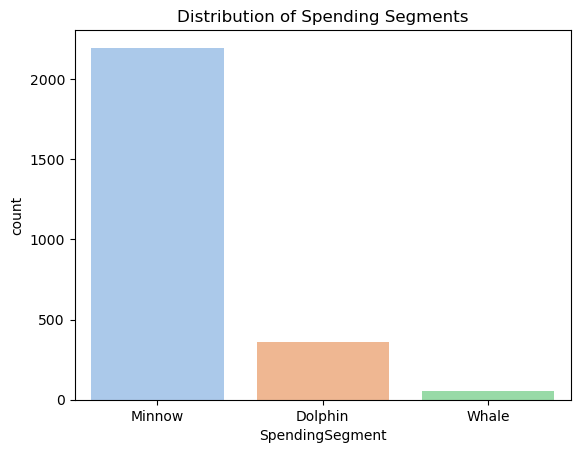

In [15]:
# Spending Segment Distribution
sns.countplot(x='SpendingSegment', hue='SpendingSegment', data=df, palette='pastel')
plt.title("Distribution of Spending Segments")
plt.show()

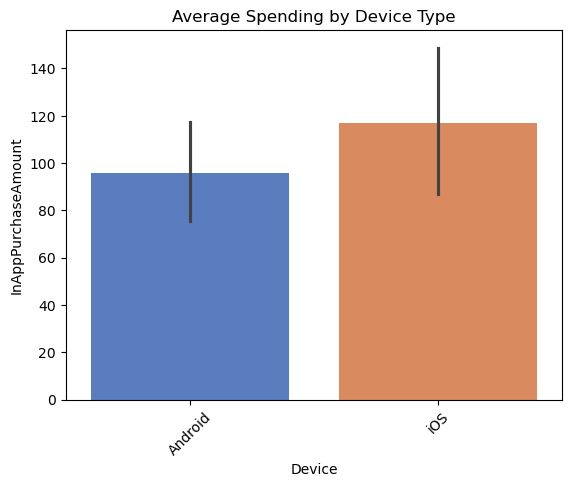

In [16]:
# Average Spending by Device
sns.barplot(x='Device', y='InAppPurchaseAmount',hue='Device', data=df, palette='muted')
plt.title("Average Spending by Device Type")
plt.xticks(rotation=45)
plt.show()

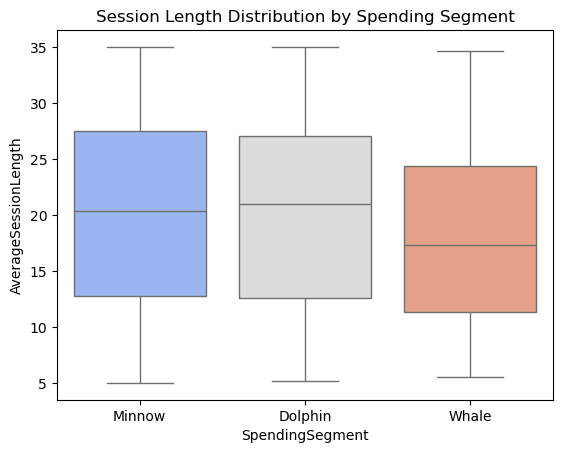

In [17]:
# Average Session Length vs Spending Segment
sns.boxplot(x='SpendingSegment', y='AverageSessionLength',hue='SpendingSegment', data=df, palette='coolwarm')
plt.title("Session Length Distribution by Spending Segment")
plt.show()

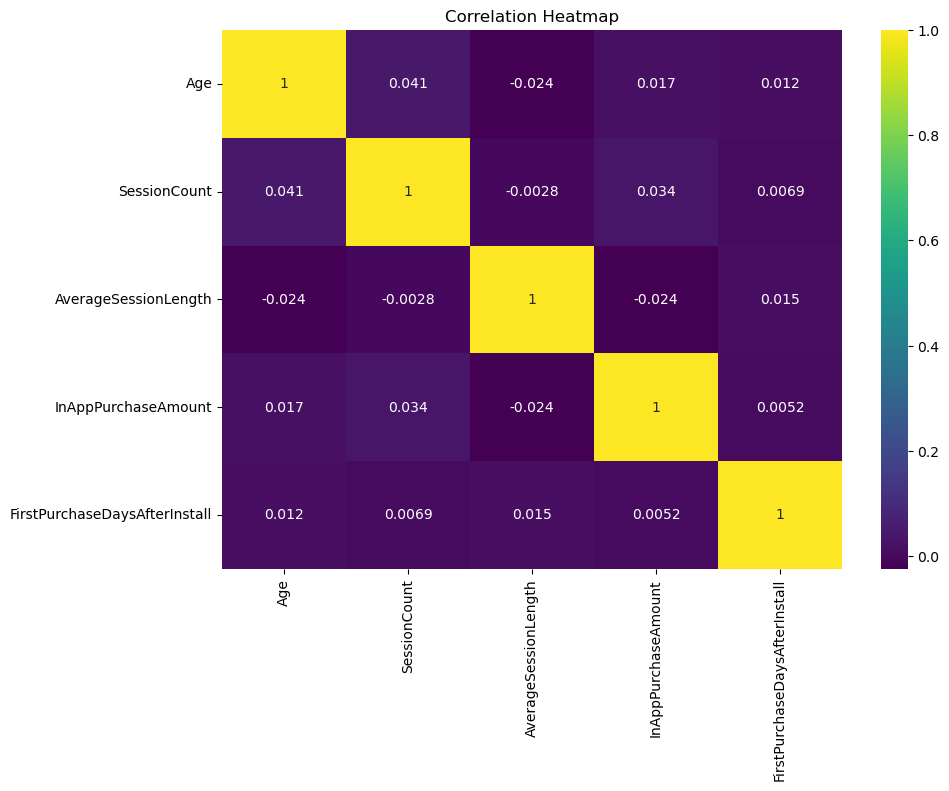

In [18]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

# feature engeenering

In [19]:
# Select features 
selected_features = ['Age', 'SessionCount', 'AverageSessionLength']

X = df[selected_features]
y = df['SpendingSegment']

In [20]:
# FEATURE EXTRACTION
# Convert LastPurchaseDate to datetime
df["LastPurchaseDate"] = pd.to_datetime(df["LastPurchaseDate"], errors='coerce')

#Extract date parts
df["LastPurchaseDay"] = df["LastPurchaseDate"].dt.day
df["LastPurchaseMonth"] = df["LastPurchaseDate"].dt.month
df["LastPurchaseWeekday"] = df["LastPurchaseDate"].dt.weekday

# Calculate days since last purchase
current_date = pd.Timestamp("2025-01-01")    
df["DaysSinceLastPurchase"] = (current_date - df["LastPurchaseDate"]).dt.days

In [21]:
#FEATURE TRANSFORMATION
# Log transform skewed amount
df["InAppPurchaseAmount"] = df["InAppPurchaseAmount"].fillna(0).clip(lower=0)
df["InAppPurchaseAmount"] = np.log1p(df["InAppPurchaseAmount"])

# Scale continuous columns
scale_cols = ["Age", "SessionCount", "AverageSessionLength", 
              "FirstPurchaseDaysAfterInstall", "InAppPurchaseAmount"]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

NameError: name 'StandardScaler' is not defined

In [ ]:
#FEATURE CREATION
# Engagement Score
df["EngagementScore"] = df["SessionCount"] * df["AverageSessionLength"]
# Loyalty Score
df["LoyaltyScore"] = 1 / (df["FirstPurchaseDaysAfterInstall"] + 1)
# Spending Per Session
df["SpendingPerSession"] = df["InAppPurchaseAmount"] / (df["SessionCount"] + 1)
# Total Active Days
df["TotalActiveDays"] = df["DaysSinceLastPurchase"] + df["FirstPurchaseDaysAfterInstall"]
# High Value User Flag
median_spend = df["InAppPurchaseAmount"].median()
df["HighValueFlag"] = (df["InAppPurchaseAmount"] > median_spend).astype(int)

In [ ]:
print(df.head())

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features=0.5,       
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)

train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_model.predict(X_test))
print("Confusion Matrix:\n", cm)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())